In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
import rosbag

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
from parse_utils import  *

In [3]:
bag = rosbag.Bag('flight3.bag')

In [5]:
data = parse_flight_data(bag)

In [6]:
bag.close()

In [ ]:
import sys

In [3]:
topics_imu = []
msgs_imu = []
t_imu = []
for topic, msg, t in bag.read_messages(topics=['/sonar_height']):
    topics_imu.append(topic)
    msgs_imu.append(msg)
    t_imu.append(t.to_sec())

In [8]:
for i in range(len(msgs_imu)):
    if msgs_imu[i].range == sys.float_info.min - 2*sys.float_info.epsilon:
        print("found collision at i = {}".format(i))

In [99]:
topics_state = []
msgs_state = []
t_state = []
for topic, msg, t in bag.read_messages(topics=['/indoor/status']):
    topics_state.append(topic)
    msgs_state.append(msg)
    t_state.append(t.to_sec())

In [102]:
msgs_state[0]

status: ''
tileDetected: 1
currentMission: 0
isFlying: False
droneConnected: True
altitude: 1000.0
robotBatteryLevel: 0
fmBatteryLevel: 0
state: 1
stateStr: "Docked"

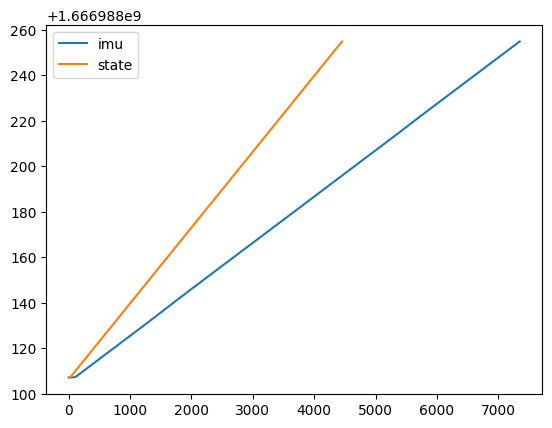

In [36]:
fig = plt.figure()
plt.plot(t_imu)
plt.plot(t_state)
plt.legend(['imu', 'state'])
plt.show()

In [42]:
t_s = []
for topic, msg, t in bag.read_messages():
    t_s.append(t.to_sec())

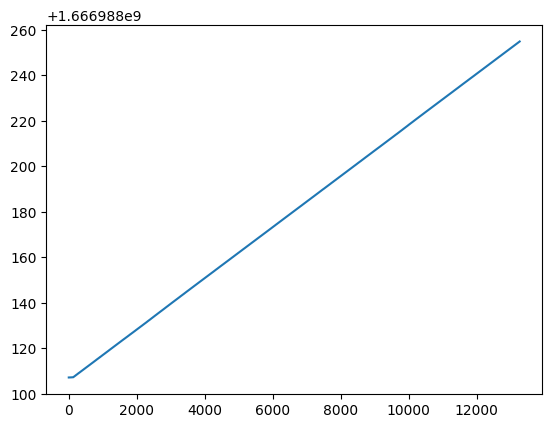

In [44]:
plt.plot(t_s)

In [89]:
from scipy.spatial.transform import Rotation as R

In [90]:
quat = [msgs_imu[0].orientation.x, msgs_imu[0].orientation.y, msgs_imu[0].orientation.z, msgs_imu[0].orientation.w]

In [91]:
r = R.from_quat(quat)

In [105]:
e = r.as_euler('xyz', degrees=True)